In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import math

In [4]:
df = pd.read_json("../data/transcript/metadata.json")
df.head()

,sample_id,source,keyword,video_id,title,channel,duration,upload_date,url,audio_path,thumbnail_path,transcript_path,transcript_text,transcript_length,language,label,status,transcribed_at
0,YT_00001,youtube,Prabowo presiden Indonesia 2024,IuE7NGQs_xk,Presiden Prabowo Tiba di Malaysia untuk Hadiri...,Sekretariat Presiden,286,20251025,https://www.youtube.com/watch?v=IuE7NGQs_xk,./data/raw/youtube/audio/YT_00001.wav,./data/raw/youtube/thumbnails/YT_00001.jpg,./data/transcript/YT_00001.txt,lotus tonka Ayo! Ayo! Ayo! Ayo! Ayo! Ayo! Ayo...,204,id,0,success,2025-10-31 18:29:39.418341+00:00
1,YT_00002,youtube,Prabowo presiden Indonesia 2024,n7rRd0IF_yc,[FULL] Wapres Gibran Umumkan Kado Istimewa dar...,KOMPASTV,456,20251024,https://www.youtube.com/watch?v=n7rRd0IF_yc,./data/raw/youtube/audio/YT_00002.wav,./data/raw/youtube/thumbnails/YT_00002.jpg,./data/transcript/YT_00002.txt,yang saya hormati sebuah pondok bahagia ia ji...,3573,id,0,success,2025-10-31 18:30:08.634255+00:00
2,YT_00003,youtube,Prabowo presiden Indonesia 2024,6f17uwi2Vtw,Live Event Rekam Jejak Prabowo Menjadi Preside...,METRO TV,222,20241020,https://www.youtube.com/watch?v=6f17uwi2Vtw,./data/raw/youtube/audio/YT_00003.wav,./data/raw/youtube/thumbnails/YT_00003.jpg,./data/transcript/YT_00003.txt,Puka perjalanan mudah bagi Prabowo Subianto h...,3071,id,0,success,2025-10-31 18:30:28.377608+00:00
3,YT_00004,youtube,Prabowo presiden Indonesia 2024,ExCBplKi6kw,"Ulas Utas, Setahun Presiden Prabowo: 'Koruptor...",tvOneNews,567,20251023,https://www.youtube.com/watch?v=ExCBplKi6kw,./data/raw/youtube/audio/YT_00004.wav,./data/raw/youtube/thumbnails/YT_00004.webp,./data/transcript/YT_00004.txt,Selama perioda satu tahun menjabat President ...,6428,id,0,success,2025-10-31 18:31:24.564553+00:00
4,YT_00005,youtube,Kabinet merah putih Prabowo,PqjwO9JEtBM,Reshuffle Kabinet Merah Putih Prabowo-Gibran |...,tvOneNews,467,20250917,https://www.youtube.com/watch?v=PqjwO9JEtBM,./data/raw/youtube/audio/YT_00005.wav,./data/raw/youtube/thumbnails/YT_00005.jpg,./data/transcript/YT_00005.txt,Presiden Perabo Subiantok kembali melakukan p...,6049,id,0,success,2025-10-31 18:32:02.061119+00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   sample_id          361 non-null    object             
 1   source             361 non-null    object             
 2   keyword            361 non-null    object             
 3   video_id           361 non-null    object             
 4   title              361 non-null    object             
 5   channel            360 non-null    object             
 6   duration           361 non-null    int64              
 7   upload_date        361 non-null    int64              
 8   url                361 non-null    object             
 9   audio_path         361 non-null    object             
 10  thumbnail_path     361 non-null    object             
 11  transcript_path    361 non-null    object             
 12  transcript_text    361 non-null    object         

In [6]:
df.describe()

,duration,upload_date,transcript_length,label
count,361.00000,3.610000e+02,361.000000,361.0
mean,347.00277,2.025020e+07,3841.808864,0.0
std,126.57726,2.491695e+03,1952.426352,0.0
min,180.00000,2.024102e+07,7.000000,0.0
25%,229.00000,2.025073e+07,2463.000000,0.0
50%,325.00000,2.025101e+07,3511.000000,0.0
75%,456.00000,2.025103e+07,4938.000000,0.0
max,599.00000,2.025103e+07,11486.000000,0.0


In [8]:
df.isnull().sum() 

sample_id            0
source               0
keyword              0
video_id             0
title                0
channel              1
duration             0
upload_date          0
url                  0
audio_path           0
thumbnail_path       0
transcript_path      0
transcript_text      0
transcript_length    0
language             0
label                0
status               0
transcribed_at       0
dtype: int64

<Axes: >

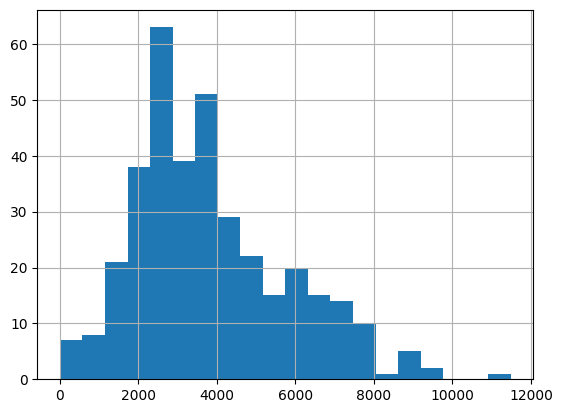

In [9]:
df["transcript_length"].hist(bins=20)

In [10]:
df["word_count"] = df["transcript_text"].apply(lambda x: len(str(x).split()))
df["word_count"].describe()

count     361.000000
mean      556.828255
std       293.110092
min         1.000000
25%       348.000000
50%       501.000000
75%       722.000000
max      1738.000000
Name: word_count, dtype: float64

In [11]:
df = df[df["word_count"] > 50]

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df["clean_text"] = df["transcript_text"].apply(clean_text)

In [14]:
df[["transcript_text", "clean_text"]].head(5)

,transcript_text,clean_text
1,yang saya hormati sebuah pondok bahagia ia ji...,yang saya hormati sebuah pondok bahagia ia jih...
2,Puka perjalanan mudah bagi Prabowo Subianto h...,puka perjalanan mudah bagi prabowo subianto hi...
3,Selama perioda satu tahun menjabat President ...,selama perioda satu tahun menjabat president p...
4,Presiden Perabo Subiantok kembali melakukan p...,presiden perabo subiantok kembali melakukan pe...
5,"Yang tomerombak kabinet peraputik, namun menk...",yang tomerombak kabinet peraputik namun menkop...


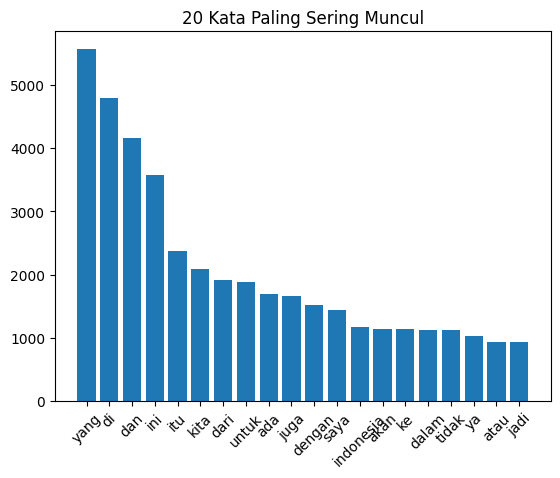

In [15]:
from collections import Counter
import matplotlib.pyplot as plt

all_words = " ".join(df["clean_text"]).split()
freq = Counter(all_words)
common_words = dict(freq.most_common(20))
plt.bar(common_words.keys(), common_words.values())
plt.xticks(rotation=45)
plt.title("20 Kata Paling Sering Muncul")
plt.show()
